In [1]:
from oil_processing import image_processing

/home/mango/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


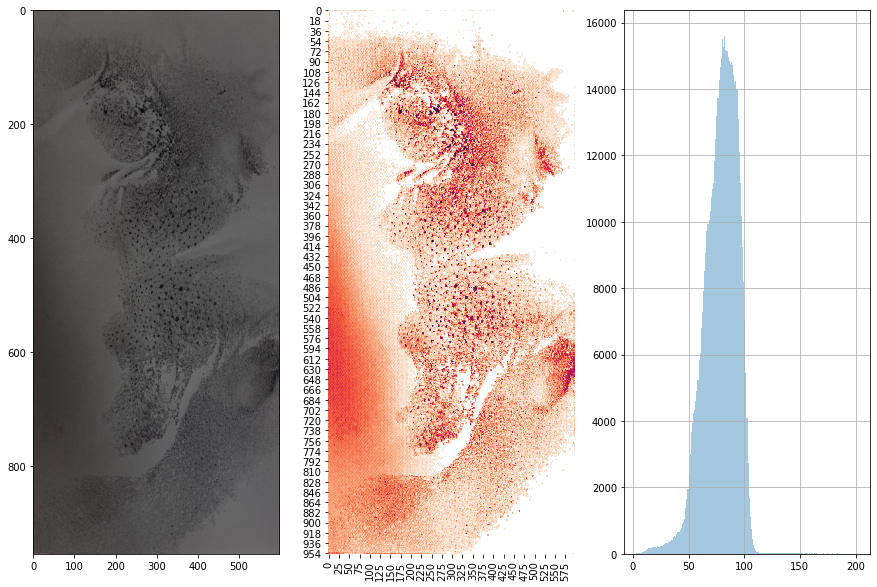

유분량:  19.0 %


In [5]:
image_processing('../File/oil_test_03.jpg', img=True, hist=True, heatmap=True)

In [2]:
image = cv2.imread('../File/test_03.jpg')
orig = image.copy()

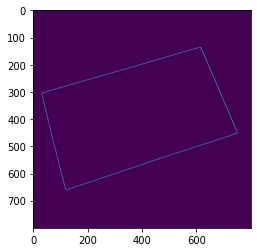

In [3]:
r = 800.0 / image.shape[0]
dim = (int(image.shape[1] * r), 800)
image = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (9,9), 0)
edged = cv2.Canny(blur, 70, 150)

plt.imshow(edged)

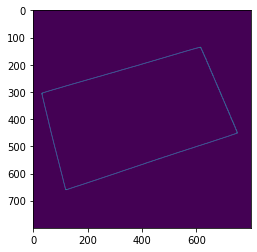

In [4]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7,7))
closed = cv2.morphologyEx(edged, cv2.MORPH_CLOSE, kernel)
plt.imshow( closed)

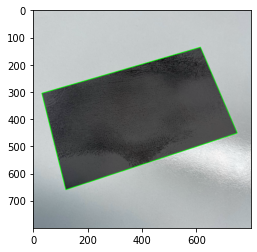

In [5]:
(cnts, _) = cv2.findContours(closed.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

cnts = sorted(cnts, key = cv2.contourArea, reverse=True)[:3]

for c in cnts:
    peri = cv2.arcLength(c,True)
    approx = cv2.approxPolyDP(c, 0.02 * peri, True)
    
    if len(approx) == 4:
        screenCnt = approx
        break
        
cv2.drawContours(image,[screenCnt], -1, (0,255,0), 2)

plt.imshow(image)

In [6]:
print(screenCnt)

[[[614 136]]

 [[ 32 305]]

 [[120 659]]

 [[749 451]]]


In [7]:
def order_points(pts):
    rect = np.zeros((4,2), dtype = "float32")
    
    s = pts.sum(axis = 1)
    
    rect[0] = pts[np.argmin(s)]
    rect[2] = pts[np.argmax(s)]
    
    diff = np.diff(pts, axis = 1)
    rect[1] = pts[np.argmin(diff)]
    rect[3] = pts[np.argmax(diff)]
    
    return rect

In [8]:
rect = order_points(screenCnt.reshape(4,2) / r)

(topLeft, topRight, bottomRight, bottomLeft) = rect

w1 = abs(bottomRight[0] - bottomLeft[0])
w2 = abs(topRight[0] - topLeft[0])
h1 = abs(topRight[1] - bottomRight[1])
h2 = abs(topLeft[1] - bottomLeft[1])

In [9]:
maxWidth = max([w1, w2])
maxHeight = max([h1, h2])

In [10]:
dst = np.float32([[0,0], [maxWidth-1,0], [maxWidth-1, maxHeight-1], [0,maxHeight-1]])

In [11]:
M = cv2.getPerspectiveTransform(rect, dst)

In [12]:
warped = cv2.warpPerspective(orig,M,(maxWidth,maxHeight))

<ipython-input-12-c02f6d8c19e2>:1: DeprecationWarning: an integer is required (got type numpy.float32).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  warped = cv2.warpPerspective(orig,M,(maxWidth,maxHeight))


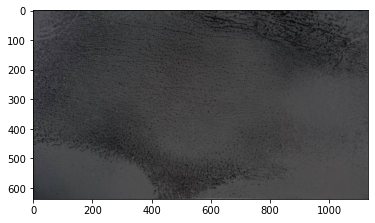

In [13]:
plt.imshow(warped)

In [14]:
warped = cv2.cvtColor(warped, cv2.COLOR_BGR2RGB)

In [15]:
warped = cv2.cvtColor(warped, cv2.COLOR_RGB2GRAY)

In [16]:
warped_thr = cv2.adaptiveThreshold(warped, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 21, 10)

In [17]:
df = pd.DataFrame(warped_thr)

In [18]:
df

,0,1,2,3,4,5,6,7,8,9,...,1122,1123,1124,1125,1126,1127,1128,1129,1130,1131
0,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
1,0,0,0,0,0,0,0,0,0,0,...,255,0,0,0,0,0,255,0,0,255
2,255,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,255,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,255,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
632,255,0,0,0,0,0,0,0,255,255,...,255,255,255,255,255,255,255,255,255,255
633,255,0,0,0,0,0,0,255,255,255,...,255,255,255,255,255,255,255,255,255,255
634,255,0,0,0,0,0,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
635,255,0,0,0,0,0,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255


In [19]:
df_warped = pd.DataFrame(warped)
df_warped

,0,1,2,3,4,5,6,7,8,9,...,1122,1123,1124,1125,1126,1127,1128,1129,1130,1131
0,172,161,154,155,148,144,151,153,137,130,...,133,125,122,124,128,131,134,135,137,136
1,116,67,64,61,74,69,65,60,70,67,...,87,84,80,72,69,85,91,83,74,95
2,129,27,49,78,79,64,70,62,63,72,...,72,70,70,71,73,75,74,80,63,72
3,136,46,52,77,84,83,78,69,70,69,...,71,73,80,78,77,76,79,79,66,60
4,129,52,56,81,83,84,82,76,72,70,...,70,73,77,76,70,69,75,78,62,69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
632,85,18,47,44,46,45,43,46,50,51,...,78,75,75,74,74,76,76,74,72,66
633,85,19,45,48,47,48,49,50,51,53,...,75,65,61,66,73,76,76,73,66,62
634,89,23,40,48,46,47,52,52,46,48,...,75,69,65,66,72,76,75,69,66,72
635,101,24,34,44,45,52,54,52,49,45,...,75,69,73,69,72,82,73,67,72,64


In [20]:
for i in range(len(df.columns)):
    for j in range(len(df.index)):
        if df[i][j] == 255:
            df_warped[i][j] = None

<ipython-input-20-cb74807df788>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_warped[i][j] = None
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [21]:
df_warped

,0,1,2,3,4,5,6,7,8,9,...,1122,1123,1124,1125,1126,1127,1128,1129,1130,1131
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,116.0,67.0,64.0,61.0,74.0,69.0,65.0,60.0,70.0,67.0,...,NaN,84.0,80.0,72.0,69.0,85.0,NaN,83.0,74.0,NaN
2,NaN,27.0,49.0,78.0,79.0,64.0,70.0,62.0,63.0,72.0,...,72.0,70.0,70.0,71.0,73.0,75.0,74.0,80.0,63.0,72.0
3,NaN,46.0,52.0,77.0,84.0,83.0,78.0,69.0,70.0,69.0,...,71.0,73.0,80.0,78.0,77.0,76.0,79.0,79.0,66.0,60.0
4,NaN,52.0,56.0,81.0,83.0,84.0,82.0,76.0,72.0,70.0,...,70.0,73.0,77.0,76.0,70.0,69.0,75.0,78.0,62.0,69.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
632,NaN,18.0,47.0,44.0,46.0,45.0,43.0,46.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
633,NaN,19.0,45.0,48.0,47.0,48.0,49.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
634,NaN,23.0,40.0,48.0,46.0,47.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
635,NaN,24.0,34.0,44.0,45.0,52.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
test_trans = df_warped.to_numpy()

In [24]:
test_trans

array([[ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [116.,  67.,  64., ...,  83.,  74.,  nan],
       [ nan,  27.,  49., ...,  80.,  63.,  72.],
       ...,
       [ nan,  23.,  40., ...,  nan,  nan,  nan],
       [ nan,  24.,  34., ...,  nan,  nan,  nan],
       [ nan,  21.,  27., ...,  nan,  nan,  49.]])

In [25]:
from PIL import Image

image = Image.fromarray(test_trans.astype('uint8'), 'L')

In [26]:
type(image)

PIL.Image.Image

In [27]:
# image.save('../File/test_01.jpg')

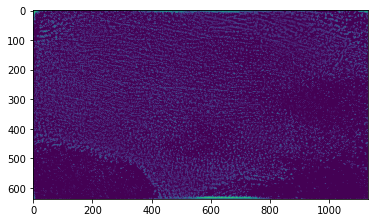

In [28]:
plt.imshow(image)

In [29]:
test_trans.shape

(637, 1132)

In [30]:
597*955

570135

In [31]:
test_trans

array([[ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [116.,  67.,  64., ...,  83.,  74.,  nan],
       [ nan,  27.,  49., ...,  80.,  63.,  72.],
       ...,
       [ nan,  23.,  40., ...,  nan,  nan,  nan],
       [ nan,  24.,  34., ...,  nan,  nan,  nan],
       [ nan,  21.,  27., ...,  nan,  nan,  49.]])

In [35]:
test_trans_df = pd.DataFrame(test_trans)

In [36]:
test_trans_df

,0,1,2,3,4,5,6,7,8,9,...,1122,1123,1124,1125,1126,1127,1128,1129,1130,1131
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,116.0,67.0,64.0,61.0,74.0,69.0,65.0,60.0,70.0,67.0,...,NaN,84.0,80.0,72.0,69.0,85.0,NaN,83.0,74.0,NaN
2,NaN,27.0,49.0,78.0,79.0,64.0,70.0,62.0,63.0,72.0,...,72.0,70.0,70.0,71.0,73.0,75.0,74.0,80.0,63.0,72.0
3,NaN,46.0,52.0,77.0,84.0,83.0,78.0,69.0,70.0,69.0,...,71.0,73.0,80.0,78.0,77.0,76.0,79.0,79.0,66.0,60.0
4,NaN,52.0,56.0,81.0,83.0,84.0,82.0,76.0,72.0,70.0,...,70.0,73.0,77.0,76.0,70.0,69.0,75.0,78.0,62.0,69.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
632,NaN,18.0,47.0,44.0,46.0,45.0,43.0,46.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
633,NaN,19.0,45.0,48.0,47.0,48.0,49.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
634,NaN,23.0,40.0,48.0,46.0,47.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
635,NaN,24.0,34.0,44.0,45.0,52.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 전체 pixel의 개수

In [37]:
test_trans_not_null_count = test_trans_df.notnull().sum().sum()
test_trans_not_null_count

99694

### 전체 pixel의 합

In [38]:
test_trans_sum = test_trans_df.sum().sum()
test_trans_sum

4142369.0

### 전체 pixel의 평균

In [39]:
test_trans_mean = test_trans_df.sum().sum() / test_trans_df.notnull().sum().sum()
test_trans_mean

41.55083555680382

### 평균보다 작은 값(유분이 진하게 묻어나오는 값)의 비율

In [40]:
(test_trans_df <= test_trans_mean).sum().sum()/test_trans_not_null_count

0.47238549962886434